Making Reusable Code

In [0]:
#Reusable Code 

data = 2021

Assigning_Values_toVariables

In [0]:
from pathlib import Path

clinicaltrial_2021  = spark.read.options(delimiter="|",header =True) \
  .csv("/FileStore/tables/clinicaltrial_"+str(data)+".csv")


mesh = spark.read.option("header",True) \
     .csv('/FileStore/tables/mesh.csv')

pharma = spark.read.option("header",True) \
     .csv('/FileStore/tables/pharma.csv')

In [0]:
#Checking the Created DataFrame
clinicaltrial_2021.display()

Id,Sponsor,Status,Start,Completion,Type,Submission,Conditions,Interventions
NCT02758028,The University of Hong Kong,Recruiting,Aug 2005,Nov 2021,Interventional,Apr 2016,null,null
NCT02751957,Duke University,Completed,Jul 2016,Jul 2020,Interventional,Apr 2016,"Autistic Disorder,Autism Spectrum Disorder",null
NCT02758483,Universidade Federal do Rio de Janeiro,Completed,Mar 2017,Jan 2018,Interventional,Apr 2016,Diabetes Mellitus,null
NCT02759848,Istanbul Medeniyet University,Completed,Jan 2012,Dec 2014,Observational,May 2016,"Tuberculosis,Lung Diseases,Pulmonary Disease",null
NCT02758860,University of Roma La Sapienza,"Active, not recruiting",Jun 2016,Sep 2020,Observational [Patient Registry],Apr 2016,"Diverticular Diseases,Diverticulum,Diverticulosis",null
NCT02757209,Consorzio Futuro in Ricerca,Completed,Apr 2016,Jan 2018,Interventional,Apr 2016,Asthma,"Fluticasone,Xhance,Budesonide,Formoterol Fumarate,Salmeterol Xinafoate"
NCT02752438,Ankara University,Unknown status,May 2016,Jul 2017,Observational [Patient Registry],Apr 2016,Hypoventilation,null
NCT02753543,Ruijin Hospital,Unknown status,Nov 2015,Nov 2019,Interventional,Apr 2016,Lymphoma,null
NCT02757508,Washington University School of Medicine,Completed,Mar 2016,Jul 2017,Interventional,Apr 2016,null,Vitamins
NCT02753530,Orphazyme,Completed,Aug 2017,Jan 2021,Interventional,Apr 2016,Myositis,null


QUESTION 1

In [0]:
#Assigning the selected column from the dataframe to a variable.
Total_Studies = clinicaltrial_2021.select(clinicaltrial_2021.Id).count()

#Listing it 
Total_Studies

Out[37]: 387261

QUESTION 2

In [0]:
#Assigning the Selected columns "Types" grouped it and Count it.
Total_Types = clinicaltrial_2021.select(clinicaltrial_2021.Type).groupBy("Type").count()

#Ordering it in Descending Order
Splitting_Types = Total_Types.orderBy("Count",ascending=False)

#Displaying all the Types using Show Function.
Splitting_Types.show()

+--------------------+------+
|                Type| count|
+--------------------+------+
|      Interventional|301472|
|       Observational| 77540|
|Observational [Pa...|  8180|
|     Expanded Access|    69|
+--------------------+------+



QUESTION 3

In [0]:
#Importing the Split and Explode from sql Function 
from pyspark.sql.functions import split, explode
#Splitting the Column Conditions with  "," using explode function
splitied_Conditions = clinicaltrial_2021.withColumn('Splitted_Conditions', explode(split(clinicaltrial_2021["Conditions"], ",")))
#Selecting  splitting conditions 
Splitting_Conditions  = splitied_Conditions.select(splitied_Conditions.Splitted_Conditions)
#Grouping it and ordering it 
Grouping = Splitting_Conditions.groupBy("Splitted_Conditions").count().orderBy("count", ascending = False)
#Showing the top 5 
Grouping.show(5)

+-------------------+-----+
|Splitted_Conditions|count|
+-------------------+-----+
|          Carcinoma|13389|
|  Diabetes Mellitus|11080|
|          Neoplasms| 9371|
|   Breast Neoplasms| 8640|
|           Syndrome| 8032|
+-------------------+-----+
only showing top 5 rows



QUESTION 4

JOINNING MESH AND MAIN DF

In [0]:
#Splitting the values.
from pyspark.sql.functions import split, explode
splited_Value =clinicaltrial_2021.withColumn('Conditions',explode(split('Conditions',',')))

In [0]:
#Importing the sql Function col and substring
from pyspark.sql.functions import col, substring
#Selecting only the term and tree with  substring splitting only the first three as Root
Mesh_Splited  = mesh.select('term' , 'tree' , substring('tree', 1,3).alias('root'))
#Now using Inner Join merging the two tables ClinicalTrial and Mesh_Splited where conditions and terms are equal
new_joined_table = splited_Value.join(Mesh_Splited,splited_Value.Conditions ==  Mesh_Splited.term,"inner")
#Selecting the Root and grouping it with count
total_types = new_joined_table.select('root').groupBy("root").count()
#Ordering it in Descending Order
arranging_order = total_types.orderBy("Count",ascending=False)
#Displaying only top 5 
arranging_order.show(5)

+----+------+
|root| count|
+----+------+
| C04|143994|
| C23|136079|
| C01|106674|
| C14| 94523|
| C10| 92310|
+----+------+
only showing top 5 rows



QUESTION 5

JOINNING PHARAMA AND MAIN DF

In [0]:
#Importing the sql Function col and substring
from pyspark.sql.functions import col, substring
#Now using Left Join merging the two tables ClinicalTrial and pharma where Sponsor and pharam are equal
new_pharma_table = clinicaltrial_2021.join(pharma,clinicaltrial_2021.Sponsor ==  pharma.Parent_Company,"left")
#Filtering out the Null Values
filtering = new_pharma_table.filter(pharma.Parent_Company.isNull())
#Selecting the Sponsor and Grouping it with a  count
total_types = filtering.select('Sponsor').groupBy("Sponsor").count()
#Ordering it by Descending Order using Count
total_types_spliting = total_types.orderBy("Count",ascending=False)
#Taking only the Top 10 with take Funtion
total_types_spliting.take(10)

Out[42]: [Row(Sponsor='National Cancer Institute (NCI)', count=3218),
 Row(Sponsor='M.D. Anderson Cancer Center', count=2414),
 Row(Sponsor='Assistance Publique - Hôpitaux de Paris', count=2369),
 Row(Sponsor='Mayo Clinic', count=2300),
 Row(Sponsor='Merck Sharp & Dohme Corp.', count=2243),
 Row(Sponsor='Assiut University', count=2154),
 Row(Sponsor='Novartis Pharmaceuticals', count=2088),
 Row(Sponsor='Massachusetts General Hospital', count=1971),
 Row(Sponsor='Cairo University', count=1928),
 Row(Sponsor='Hoffmann-La Roche', count=1828)]

QUESTION 6

In [0]:
#Importing the  dateformat Libraries from the SQL
import pyspark.sql.functions as F
from pyspark.sql.functions import year
from pyspark.sql.functions import substring
from pyspark.sql.functions  import date_format, to_date
from pyspark.sql.functions import month

#Filtering only the Completed  values from the Status Column
Completed_Month = clinicaltrial_2021.filter(clinicaltrial_2021.Status == "Completed") 
#Changing the datatype of the Completetion  column into TimeStamp 
Changing_dft= Completed_Month.select("Completion","Status",date_format(to_date("Completion", "MMM yyyy"),"MM-dd-yyyy").alias("ifrs_year_dt"))
#Selecting only the Completion , status and the TimeStamp Converted  Completetion Columns
total_types = Changing_dft.select('Completion','Status','ifrs_year_dt')
#Selecting only the particular year 2021 with the use of substring
selecting_year = total_types.where(substring("Completion",5,8) == "2021")
#Selecting only the month  value (frist three digit) from the Completion column  using the substring
selected_month_date = selecting_year.select(substring("Completion",1,3).alias("month"),"Status","ifrs_year_dt")
#Selecting month and the TimeStamp Converted  Completetion Column
Grouping = selected_month_date.select("month","ifrs_year_dt")
#Counting and order it by TimeStamp Converted  Completetion Column in ascending order with count
Grouping_1 = Grouping.groupBy("month","ifrs_year_dt").count().orderBy("ifrs_year_dt",ascending = True)
#Now selecting only the month and the newly created Count Column
Listing = Grouping_1.select("month","count")
#Finally displaying the values in month wise
Listing.show()

+-----+-----+
|month|count|
+-----+-----+
|  Jan| 1131|
|  Feb|  934|
|  Mar| 1227|
|  Apr|  967|
|  May|  984|
|  Jun| 1094|
|  Jul|  819|
|  Aug|  700|
|  Sep|  528|
|  Oct|  187|
+-----+-----+



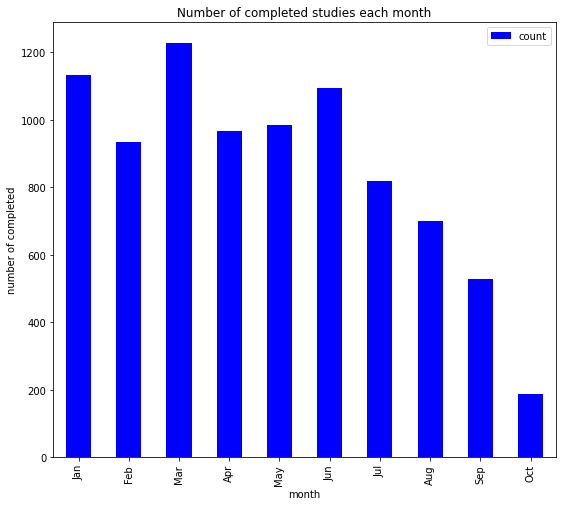

In [0]:
#Converting the df to pandas DF
Pandas_Conversion  = Listing.toPandas()
#Importing the matplotlib library
import matplotlib.pyplot as plt

#Assigning the x values and y values with figure size ,kind of chart and  color
Pandas_Conversion.plot(x="month", y=["count"], kind="bar", figsize=(9, 8),color='blue')
#Giving it a Tittle
plt.title("Number of completed studies each month")
#Giving y label
plt.ylabel("number of completed")


#print bar graph
plt.show()

Out[45]: <AxesSubplot:ylabel='count'>

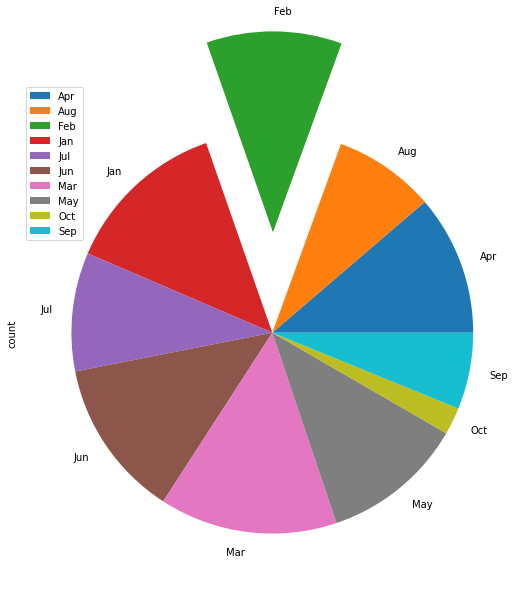

In [0]:
import matplotlib.pyplot as plt
import numpy as np

explode = (0,0, 0.5, 0,0,0,0,0,0,0)
Pandas_Conversion.groupby(['month']).sum().plot(kind='pie', y='count' ,figsize=(9, 20),explode=explode)

Further Analysis

Comapnies that made Highest number of Offences related to health.

In [0]:
#Selecting only the company and Offense Group from the list 
Selecting_Companies = pharma.select("Company","Offense_Group")
#Filtering the Offence Group column which has only healthrelated offences 
offences_Company = Selecting_Companies.filter(Selecting_Companies.Offense_Group == "healthcare-related offenses") 
#Getting the count of the companies that makes the offence 
grouping = offences_Company.groupby(offences_Company.Offense_Group,"Company").count()
#Ordering it based on the  counts of the offences
Ordering = grouping.orderBy("count",ascending = False)
#Selecting only the Company and count columns
filter_further = Ordering.select("Company", "count")
#Displaying only Top 10 companies list.
filter_further.show(10)

+--------------------+-----+
|             Company|count|
+--------------------+-----+
|   Johnson & Johnson|    5|
|         Pfizer Inc.|    5|
|Eli Lilly and Com...|    4|
|Janssen Pharmaceu...|    3|
|       Purdue Pharma|    3|
|          Amgen Inc.|    3|
|Amneal Pharmaceut...|    3|
|           Eli Lilly|    3|
|   Novo Nordisk Inc.|    3|
|     GlaxoSmithKline|    3|
+--------------------+-----+
only showing top 10 rows

